In [2]:
import os
os.chdir("/mnt/iusers01/jw01/mdefscs4/ra_challenge/hestia/Hestia_imeche_vision_challenge/NN_recognition_train")

In [3]:
import os
import pandas as pd
import numpy as np
import random
import tensorflow as tf
import tensorflow.keras as k
import glob
from PIL import Image
import argparse
import sys

from dataset.train_generator import retrieve_tf_dataset
# from model.mobile_net import retrieve_mobilenet_model

In [ ]:
tf_data = retrieve_tf_dataset()

In [4]:
special_loss()
mask = logits != 0 
weights = tf.cast(mask, tf.float32) 
labels = tf.cast(labels, tf.float32)
logits = tf.cast(logits, tf.float32)
tf.compat.v1.losses.softmax_cross_entropy(labels[mask], logits[mask]) 




def retrieve_mobilenet_model():
    base_model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3),
                                               include_top=False,
                                               weights='imagenet')
    preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

    inputs = tf.keras.Input(shape=(224, 224, 3))
    x = preprocess_input(inputs)
    x = base_model(x)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(500, activation = "relu")(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    presence = tf.keras.layers.Dense(1, activation = "sigmoid", name = "presence")(x)
    coordinates = tf.keras.layers.Dense(8, name = "coordinates")(x)
    letter = tf.keras.layers.Dense(36, activation = "sigmoid", name = "letter")(x)
    model = tf.keras.Model(inputs, [presence, coordinates, letter])

    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0003),
                loss={"presence":"binary_crossentropy", "coordinates":tf.keras.losses.MeanAbsoluteError(), "letter":"categorical_crossentropy"},
                metrics={"presence":'accuracy',"coordinates":["mae", "mse"], "letter":"accuracy"})

    return model
model = retrieve_mobilenet_model()

In [5]:
model.fit(tf_data)

      7/Unknown - 35s 4s/step - loss: nan - presence_loss: nan - coordinates_loss: nan - letter_loss: nan - presence_accuracy: 0.5786 - coordinates_mae: nan - coordinates_mse: nan - letter_accuracy: 0.4045

KeyboardInterrupt: 

In [4]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 16) 448         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 16) 64          conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 55, 55, 16)   2320        batch_normalization[0][0]        
______________________________________________________________________________________________

In [6]:
a = model.predict(tf_data.take(2))

In [7]:
a[0]

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]], dtype=float32)

In [8]:
for a,b in tf_data.take(5):
    pass

In [9]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


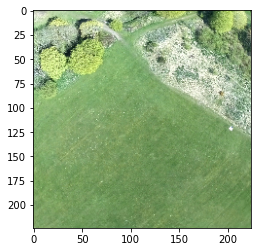

In [10]:
plt.imshow(a[0,]/255)